# CROP RECOMMENDATION SYSTEM 

## Importing Neccessary Libraries 

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')


## Importing Dataset

In [2]:
PATH = 'Crop_recommendation.csv'
df = pd.read_csv(PATH)

## Exploratory Data Analysis

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df['label']=LabelEncoder().fit_transform(df['label'])
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [10]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label            int32
dtype: object

In [11]:
df['label'].value_counts()

label
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

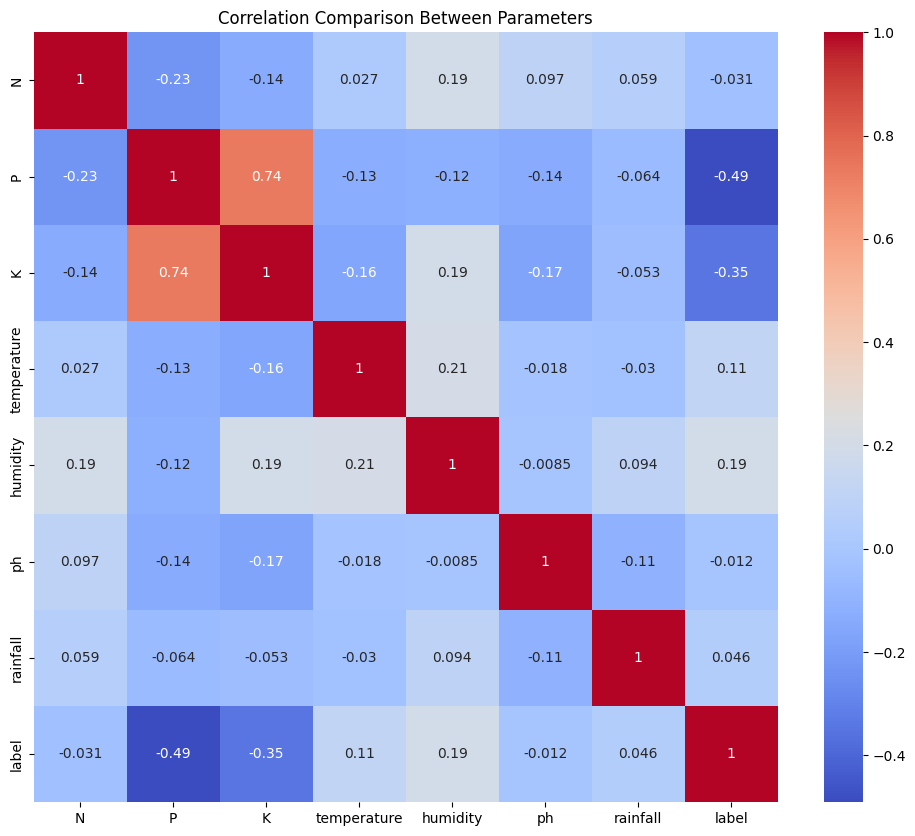

In [15]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Comparison Between Parameters')
plt.savefig('../Correlation Comparison.png', dpi=1000, bbox_inches='tight')
plt.show()

## Initiailizing

In [16]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [132]:
acc_list = []
precision_list = []
recall_list = []
f1_list = []
model_list = []
cross_val_score_list = []
model_type_list = []

In [18]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [19]:
def plot_cv_scores(cv_scores, model_name, figsize=(8, 4),diretory = 'Base Models'):
    plt.figure(figsize=figsize)
    plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b', label='CV Scores')
    plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label='Mean CV Score')
    plt.title(f'Cross-Validation Scores for {model_name}')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.xticks(range(1, len(cv_scores) + 1))
    plt.legend()
    plt.grid()
    plt.savefig('../'+ diretory + '/CrossValidationScore/'+model_name+'CVScore', dpi=1000, bbox_inches='tight')
    plt.show()

In [20]:
def plot_classification_report(report, model_name,diretory = 'Base Models'):
    df_report = pd.DataFrame(report).transpose()
    plt.figure(figsize=(6, 10))
    sns.heatmap(df_report.iloc[:-1, :], annot=True, cmap='Blues', fmt='.2f', cbar_kws={"orientation": "vertical"})
    plt.title(f'Classification Report for {model_name}')
    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.xticks(rotation=45)
    plt.savefig('../'+ diretory + '/Classification Report/'+model_name + 'CR', dpi=1000, bbox_inches='tight')
    plt.show()

In [21]:
def dataframe_to_image(df, filename='Results.png',path='Base Models', figsize=(10, 3)):
    df_reset = df.reset_index()
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=df_reset.values, colLabels=df_reset.columns, cellLoc='center', loc='center')
    plt.savefig('../' + path + '/Comparative Analysis/'+filename, dpi=1000, bbox_inches='tight')
    plt.show()

In [22]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta', 'pink', 'gold', 'lime', 'teal', 'navy']

In [181]:
def train_and_evaluate_model(model, model_name, acc_arr, precision_arr,recall_arr,f1_arr,model_arr,cross_val_score_arr,model_type_arr,model_path = 'Base Model'):
    model.fit(Xtrain, Ytrain)
    predicted_values = model.predict(Xtest)

    acc = metrics.accuracy_score(Ytest, predicted_values)
    precision = precision_score(Ytest, predicted_values, average='weighted')
    recall = recall_score(Ytest, predicted_values, average='weighted')
    f1 = f1_score(Ytest, predicted_values, average='weighted')
    cv_scores = cross_val_score(model, Xtrain, Ytrain, cv=5)

    acc_arr.append(acc * 100)
    precision_arr.append(precision)
    recall_arr.append(recall)
    f1_arr.append(f1)
    model_arr.append(model_name)
    cross_val_score_arr.append(cv_scores.mean())
    model_type_arr.append(model_path)

    print(f"{model_name}'s Accuracy: {acc * 100}%")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

    plot_cv_scores(cv_scores, model_name,diretory=model_path+'s')
    report = classification_report(Ytest, predicted_values, output_dict=True)
    plot_classification_report(report, model_name,diretory=model_path+'s')

    pkl_filename = f'../{model_path}s/Models/{model_name}.pkl'
    with open(pkl_filename, 'wb') as Model_pkl:
        pickle.dump(model, Model_pkl)

## Base Models

### 1) DecisionTree

In [133]:
def DecisionTreeAlgo(model_name='DecisionTree'):
    DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=4)
    train_and_evaluate_model(DecisionTree, model_name,acc_list,precision_list,recall_list,f1_list,model_list,cross_val_score_list,model_type_list)


DecisionTree's Accuracy: 69.77272727272728%
Precision: 0.5943390787957741
Recall: 0.6977272727272728
F1 Score: 0.6226615340798632
Cross-Validation Scores: [0.67897727 0.71590909 0.68465909 0.70170455 0.66761364]
Mean Cross-Validation Score: 0.6897727272727272


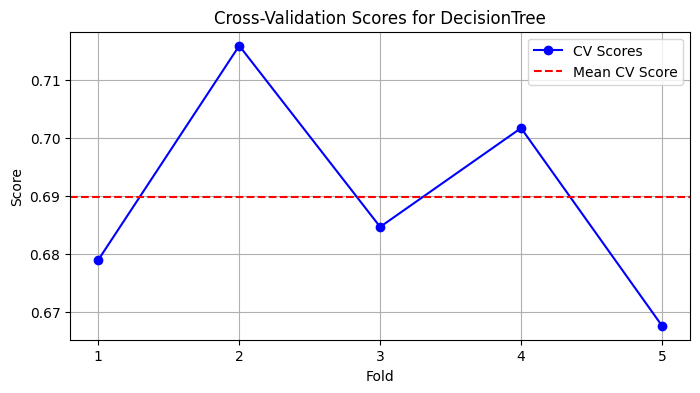

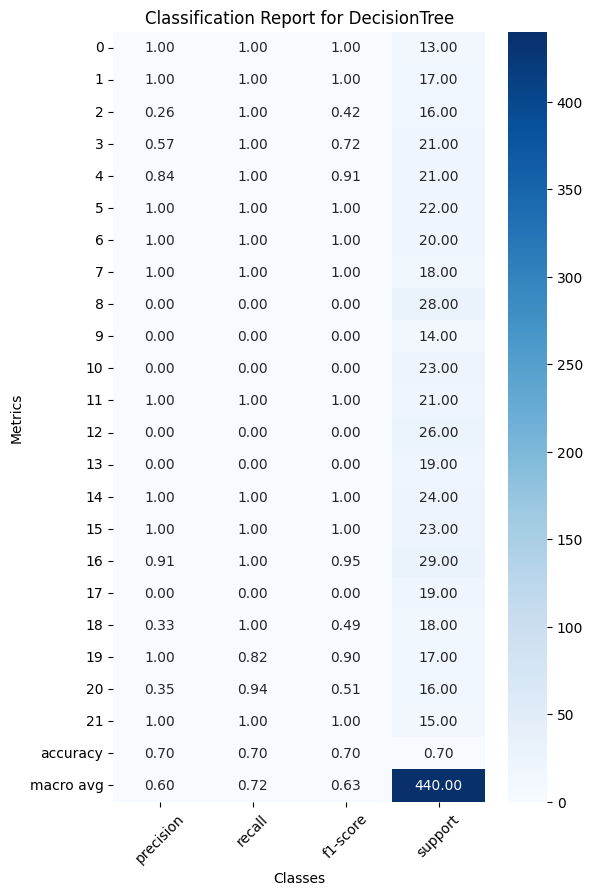

In [134]:
DecisionTreeAlgo()

### 2)  NaiveBayes

In [135]:
def NaiveBayesAlgo(model_name='NaiveBayes'):
    NaiveBayes = GaussianNB()
    train_and_evaluate_model(NaiveBayes, model_name,acc_list,precision_list,recall_list,f1_list,model_list,cross_val_score_list,model_type_list)


NaiveBayes's Accuracy: 99.0909090909091%
Precision: 0.9920454545454546
Recall: 0.990909090909091
F1 Score: 0.9905627705627705
Cross-Validation Scores: [0.99715909 0.99715909 0.99715909 0.99431818 0.99431818]
Mean Cross-Validation Score: 0.9960227272727273


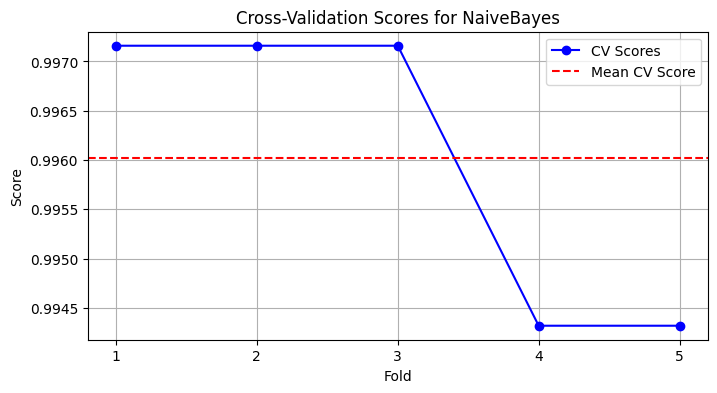

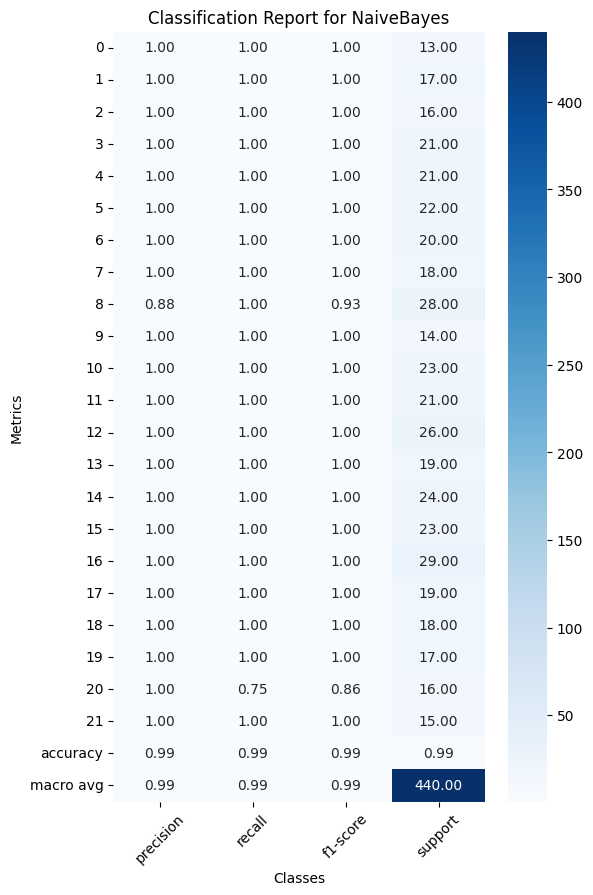

In [136]:
NaiveBayesAlgo()

### 3) SupportVectorMachine (SVM)

In [137]:
def SupportVectorMachineAlgo(model_name='SupportVectorMachine'):
    SupportVectorMachine = SVC(gamma='scale',kernel='sigmoid')
    train_and_evaluate_model(SupportVectorMachine, model_name,acc_list,precision_list,recall_list,f1_list,model_list,cross_val_score_list,model_type_list)

SupportVectorMachine's Accuracy: 77.04545454545455%
Precision: 0.8012962170161841
Recall: 0.7704545454545455
F1 Score: 0.7711689437943745
Cross-Validation Scores: [0.79829545 0.80113636 0.76988636 0.77840909 0.78693182]
Mean Cross-Validation Score: 0.7869318181818182


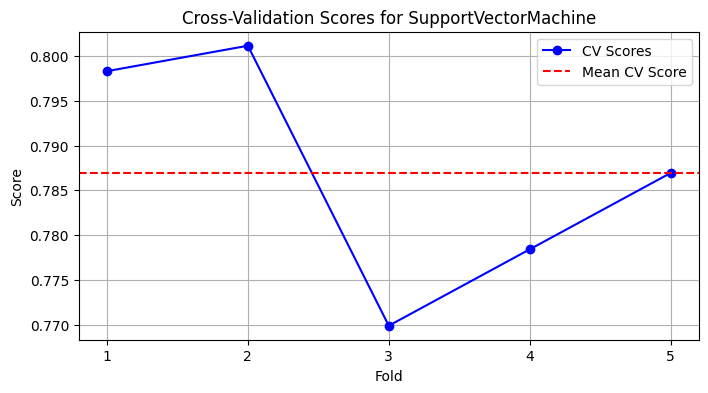

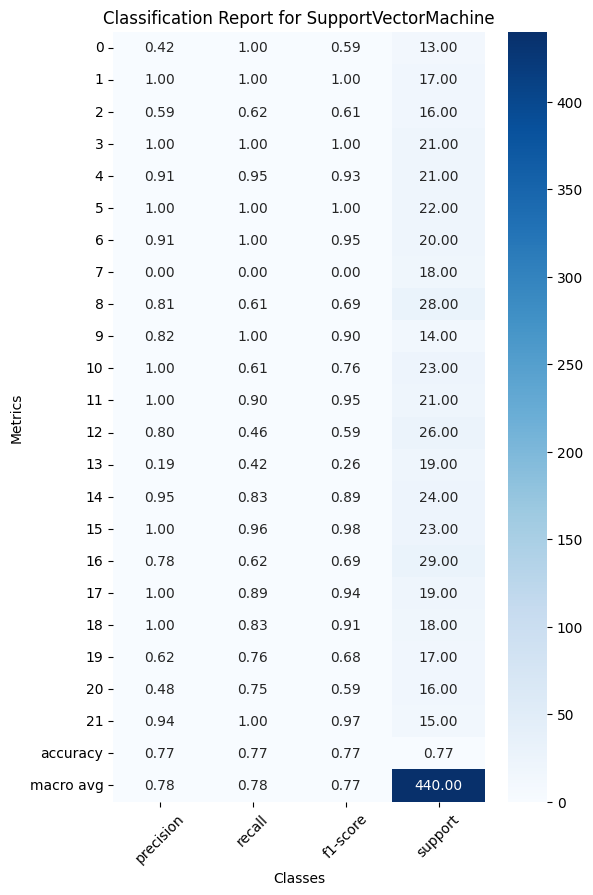

In [138]:
SupportVectorMachineAlgo()

### 4) LogisticRegression

In [139]:
def LogisticRegressionAlgo(model_name='LogisticRegression'):
    LogisticReg = LogisticRegression(random_state=2)
    train_and_evaluate_model(LogisticReg, model_name,acc_list,precision_list,recall_list,f1_list,model_list,cross_val_score_list,model_type_list)

LogisticRegression's Accuracy: 96.36363636363636%
Precision: 0.9644089900541513
Recall: 0.9636363636363636
F1 Score: 0.9631002055388137
Cross-Validation Scores: [0.98011364 0.95738636 0.97159091 0.97727273 0.97443182]
Mean Cross-Validation Score: 0.972159090909091


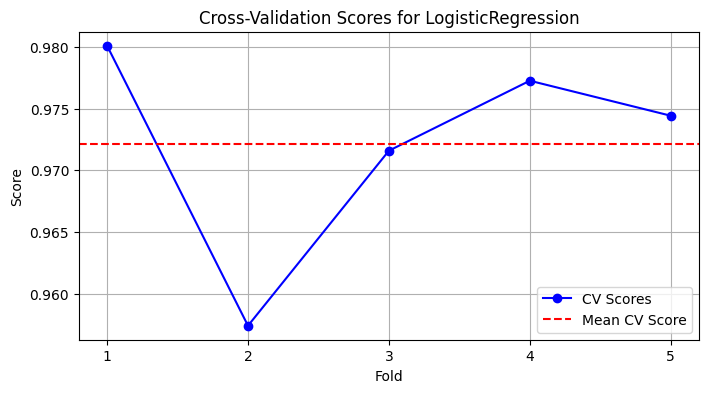

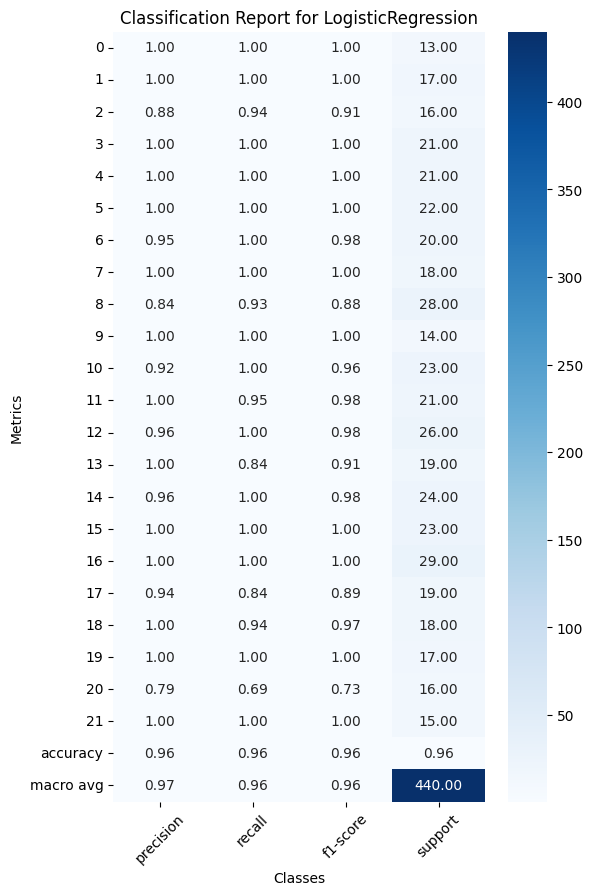

In [140]:
LogisticRegressionAlgo()

### 5) RandomForest

In [141]:
def RandomForestAlgo(model_name='RandomForest'):
    RandomForest = RandomForestClassifier(n_estimators=5, random_state=0)
    train_and_evaluate_model(RandomForest, model_name,acc_list,precision_list,recall_list,f1_list,model_list,cross_val_score_list,model_type_list)

RandomForest's Accuracy: 99.0909090909091%
Precision: 0.9913077456688004
Recall: 0.990909090909091
F1 Score: 0.9908488232872642
Cross-Validation Scores: [0.99431818 0.98863636 0.99147727 0.98863636 0.98579545]
Mean Cross-Validation Score: 0.9897727272727274


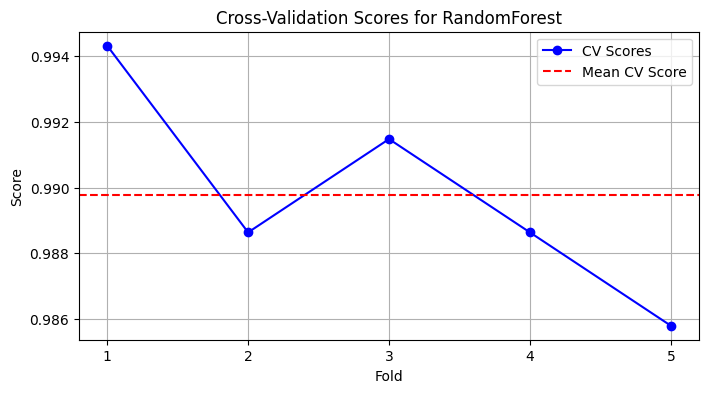

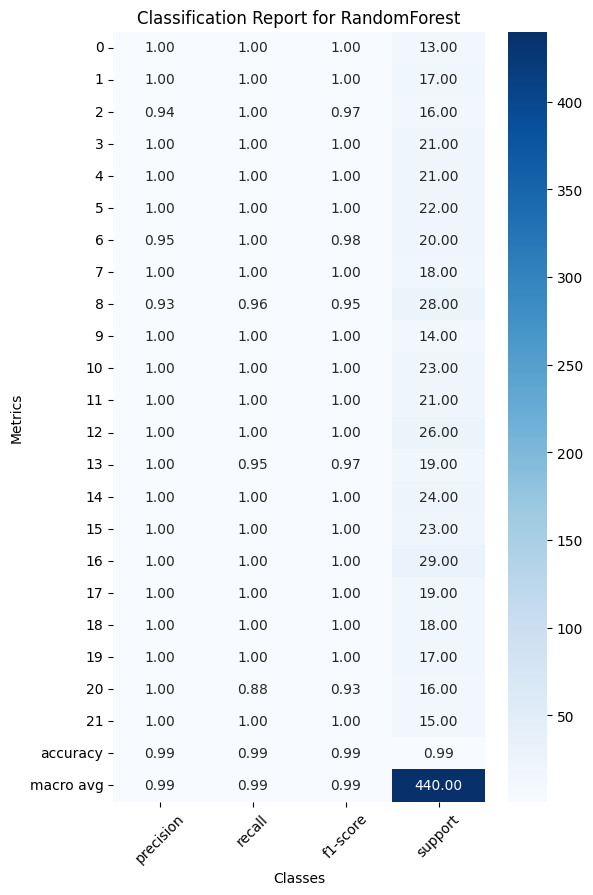

In [142]:
RandomForestAlgo()

### 6) XGBoost

In [143]:
def XGBoostAlgo(model_name='XGBoost'):
    XGBoost = xgb.XGBClassifier()
    train_and_evaluate_model(XGBoost, model_name,acc_list,precision_list,recall_list,f1_list,model_list,cross_val_score_list,model_type_list)

XGBoost's Accuracy: 99.0909090909091%
Precision: 0.9912593419199492
Recall: 0.990909090909091
F1 Score: 0.9908361023142658
Cross-Validation Scores: [0.99147727 0.98579545 0.97727273 0.98579545 0.98863636]
Mean Cross-Validation Score: 0.9857954545454545


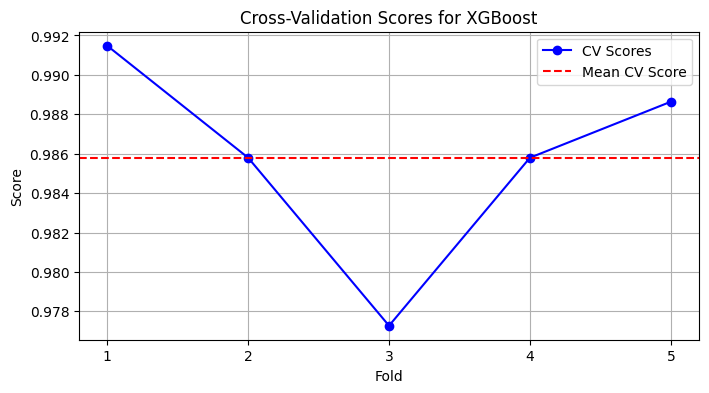

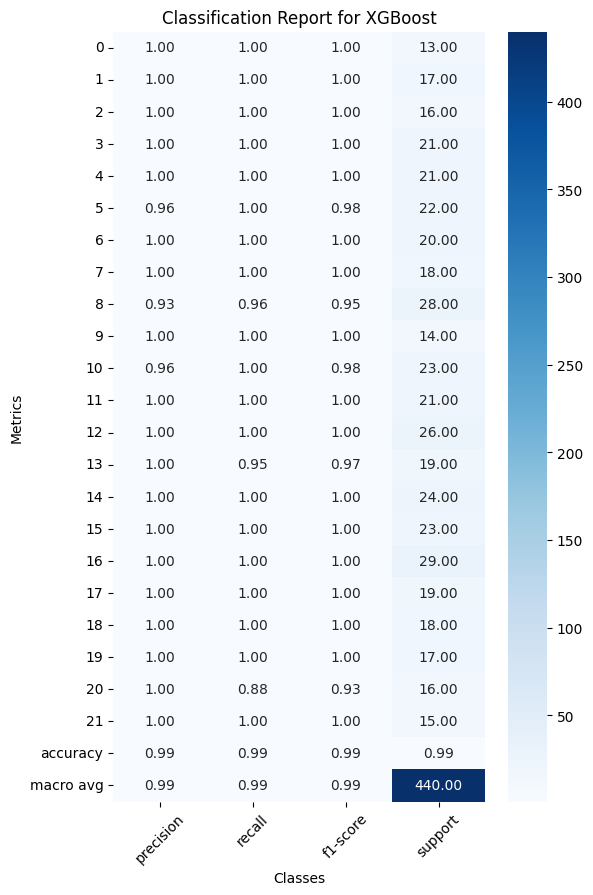

In [144]:
XGBoostAlgo()

### 7) KNN

In [145]:
def KthNearestNeighborAlgo(model_name='KthNearestNeighbor'):
    KthNearestNeighbor = KNeighborsClassifier(n_neighbors=3)
    train_and_evaluate_model(KthNearestNeighbor, model_name,acc_list,precision_list,recall_list,f1_list,model_list,cross_val_score_list,model_type_list)

KthNearestNeighbor's Accuracy: 96.81818181818181%
Precision: 0.9697767605423109
Recall: 0.9681818181818181
F1 Score: 0.968162434612329
Cross-Validation Scores: [0.98579545 0.98295455 0.97159091 0.96022727 0.98863636]
Mean Cross-Validation Score: 0.977840909090909


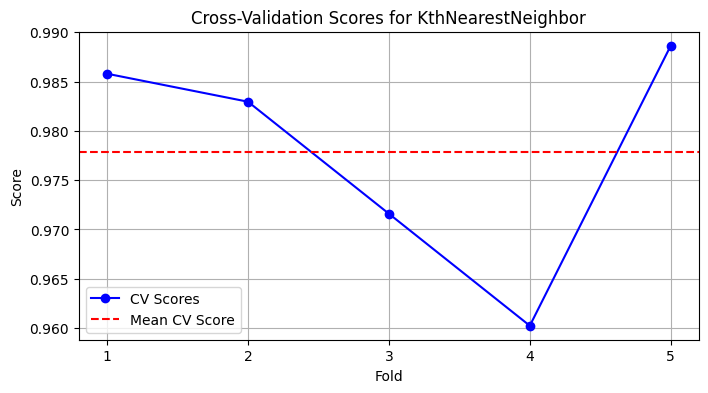

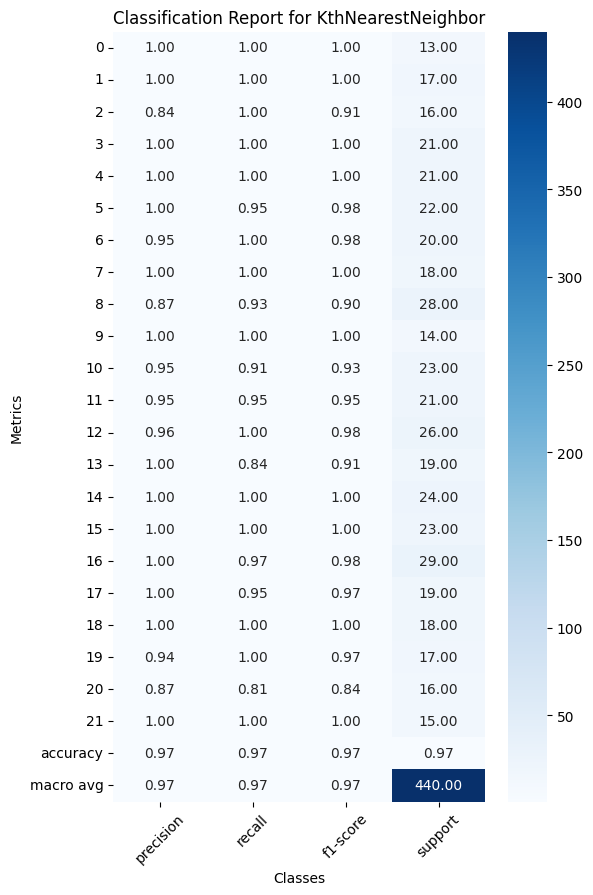

In [146]:
KthNearestNeighborAlgo()

### 8) GradientBoost

In [147]:
def GradientBoostingAlgo(model_name='GradientBoosting'):
    GradientBoosting = GradientBoostingClassifier()
    train_and_evaluate_model(GradientBoosting, model_name,acc_list,precision_list,recall_list,f1_list,model_list,cross_val_score_list,model_type_list)

GradientBoosting's Accuracy: 99.31818181818181%
Precision: 0.9938005050505051
Recall: 0.9931818181818182
F1 Score: 0.9932352179411001
Cross-Validation Scores: [0.99431818 0.98295455 0.98863636 0.98863636 0.98579545]
Mean Cross-Validation Score: 0.9880681818181818


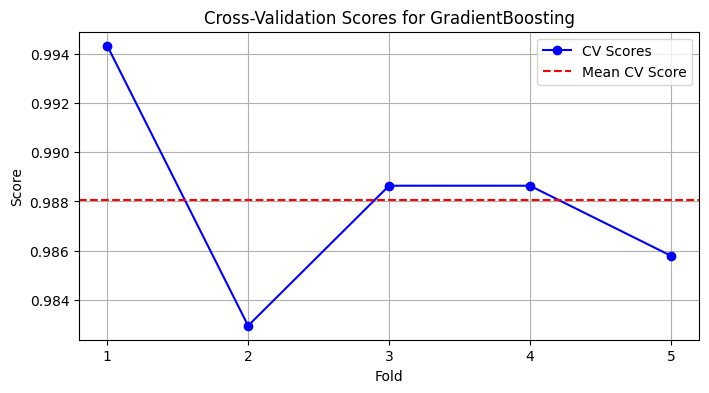

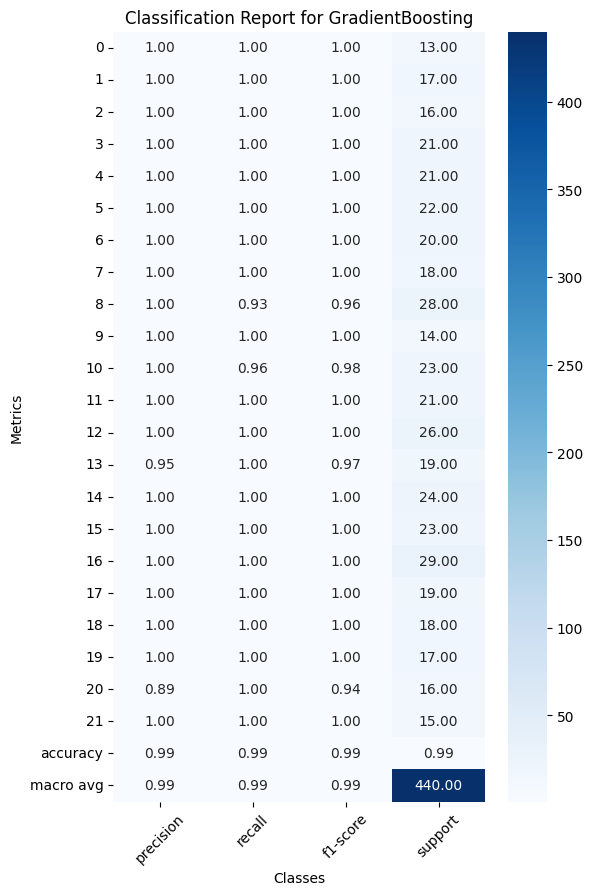

In [148]:
GradientBoostingAlgo()

### 9) ExtraTrees

In [149]:
def ExtraTreesAlgo(model_name='ExtraTrees'):
    ExtraTrees = ExtraTreesClassifier(n_estimators=100, random_state=0)
    train_and_evaluate_model(ExtraTrees, model_name,acc_list,precision_list,recall_list,f1_list,model_list,cross_val_score_list,model_type_list)

ExtraTrees's Accuracy: 99.54545454545455%
Precision: 0.9957575757575757
Recall: 0.9954545454545455
F1 Score: 0.9953814002089865
Cross-Validation Scores: [0.99431818 0.99147727 0.99147727 0.99431818 0.99431818]
Mean Cross-Validation Score: 0.9931818181818182


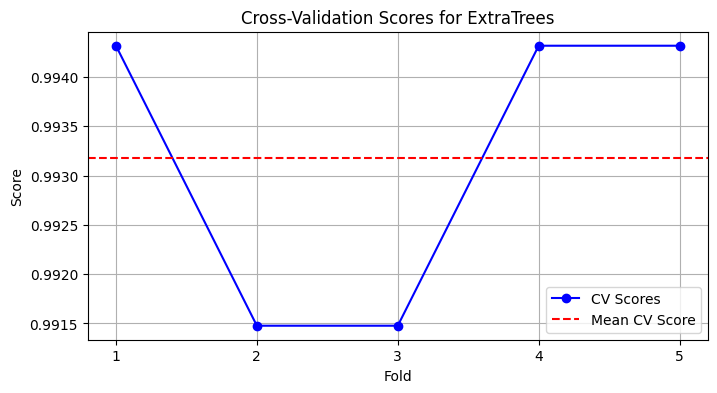

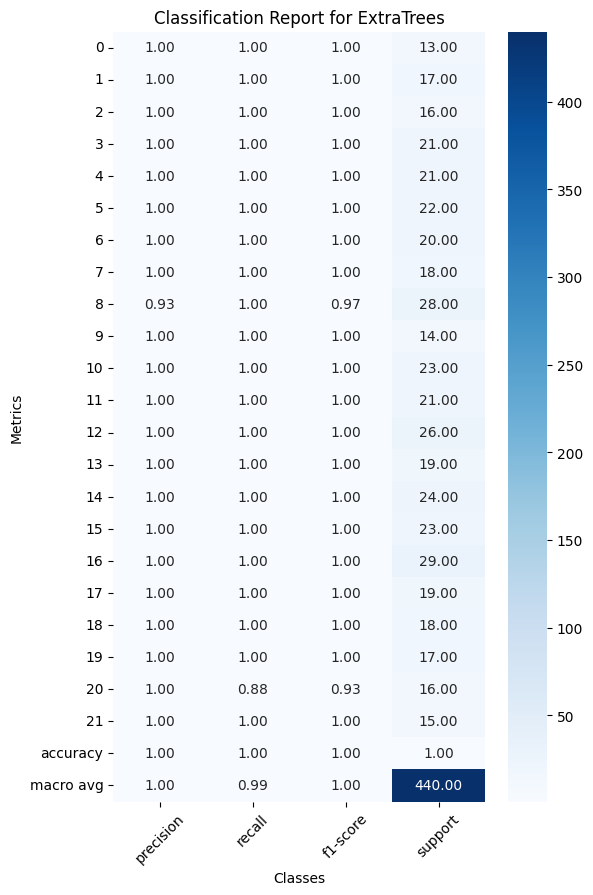

In [150]:
ExtraTreesAlgo()

### 10) CatBoost

In [151]:
def CatBoostAlgo(model_name='CatBoost'):
    CatBoost = CatBoostClassifier(iterations=10, learning_rate=0.1, depth=3, verbose=0)
    train_and_evaluate_model(CatBoost, model_name,acc_list,precision_list,recall_list,f1_list,model_list,cross_val_score_list,model_type_list)

CatBoost's Accuracy: 88.86363636363637%
Precision: 0.8726976989142765
Recall: 0.8886363636363637
F1 Score: 0.8697936694885695
Cross-Validation Scores: [0.90909091 0.88352273 0.89772727 0.89488636 0.89204545]
Mean Cross-Validation Score: 0.8954545454545455


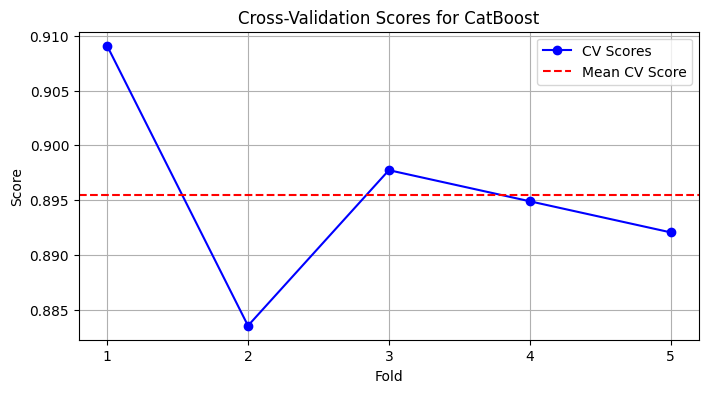

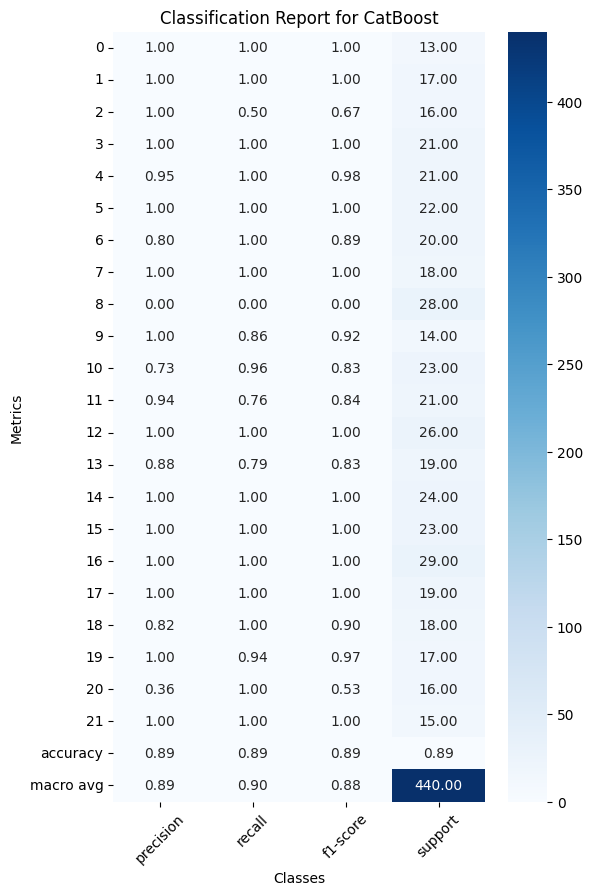

In [152]:
CatBoostAlgo()

### 11) AdaBoost

In [153]:
def AdaBoostAlgo(model_name='AdaBoost'):
    AdaBoost = AdaBoostClassifier(n_estimators=10, random_state=0)
    train_and_evaluate_model(AdaBoost, model_name,acc_list,precision_list,recall_list,f1_list,model_list,cross_val_score_list,model_type_list)

AdaBoost's Accuracy: 16.136363636363637%
Precision: 0.11361045273771744
Recall: 0.16136363636363638
F1 Score: 0.11980936130312479
Cross-Validation Scores: [0.13920455 0.18465909 0.14204545 0.14488636 0.19034091]
Mean Cross-Validation Score: 0.16022727272727272


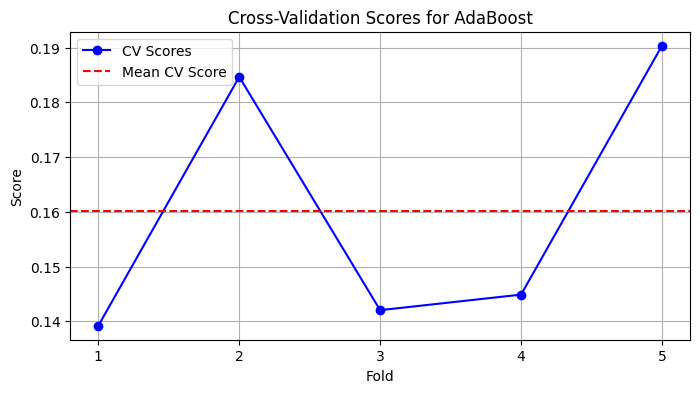

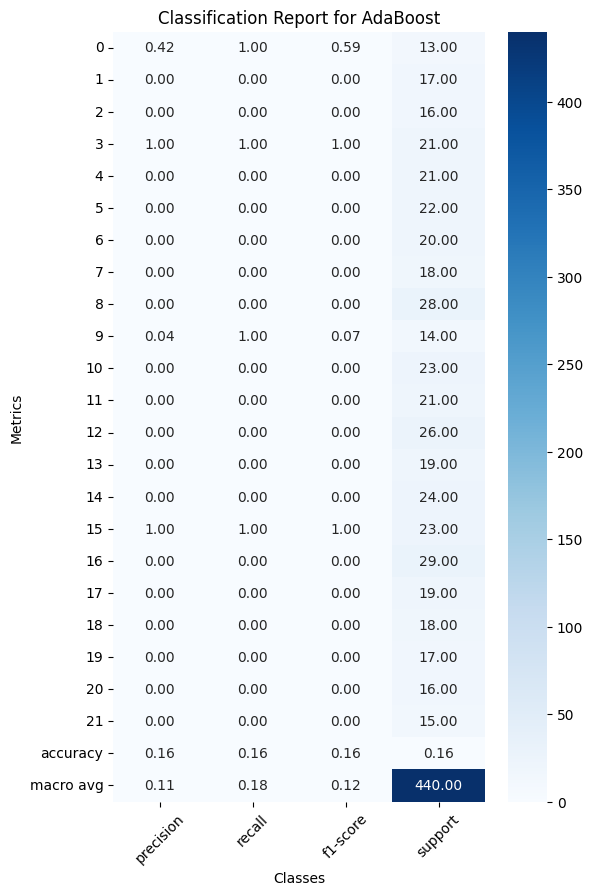

In [154]:
AdaBoostAlgo()

### 12) LightGBM

In [155]:
def LightGBMAlgo(model_name='LightGBM'):
    LightGBM = lgb.LGBMClassifier(n_estimators=3, verbosity=-1)
    train_and_evaluate_model(LightGBM, model_name,acc_list,precision_list,recall_list,f1_list,model_list,cross_val_score_list,model_type_list)

LightGBM's Accuracy: 98.86363636363636%
Precision: 0.9890279015646662
Recall: 0.9886363636363636
F1 Score: 0.9886678213660804
Cross-Validation Scores: [0.97443182 0.97159091 0.98011364 0.97159091 0.97159091]
Mean Cross-Validation Score: 0.9738636363636364


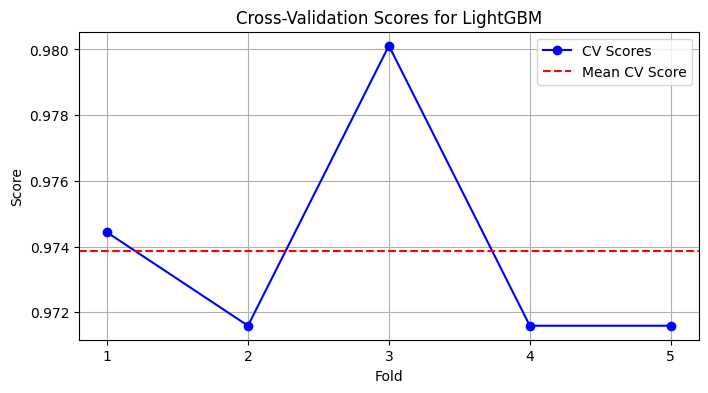

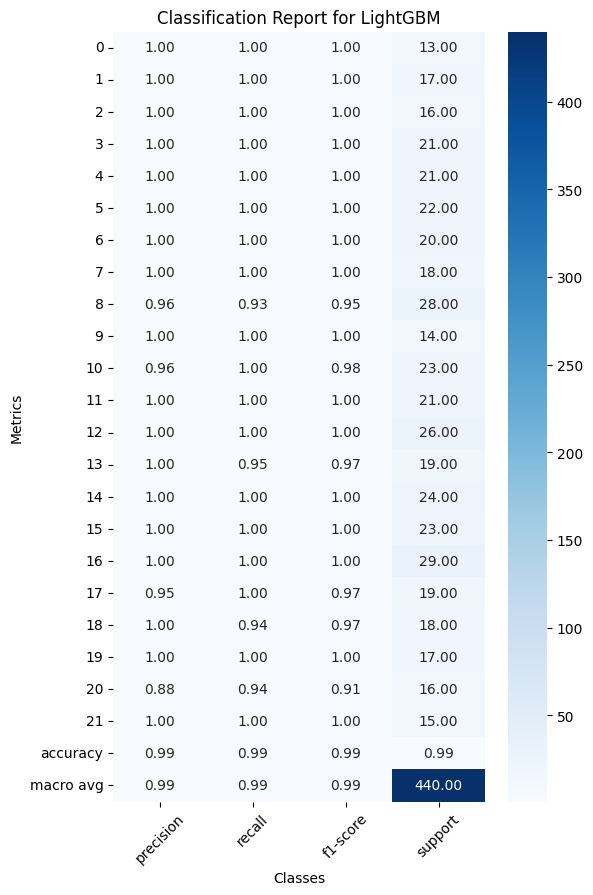

In [156]:
LightGBMAlgo()

### 13) MultiLayerPerceptron (MLP)

In [157]:
def MultiLayerPerceptronAlgo(model_name='MultiLayerPerceptron'):
    MultiLayerPerceptron = MLPClassifier(hidden_layer_sizes=(100,), max_iter=50, random_state=0)
    train_and_evaluate_model(MultiLayerPerceptron, model_name,acc_list,precision_list,recall_list,f1_list,model_list,cross_val_score_list,model_type_list)

MultiLayerPerceptron's Accuracy: 93.63636363636364%
Precision: 0.9456312913864791
Recall: 0.9363636363636364
F1 Score: 0.9367955558432381
Cross-Validation Scores: [0.93181818 0.93181818 0.92045455 0.95170455 0.94318182]
Mean Cross-Validation Score: 0.9357954545454545


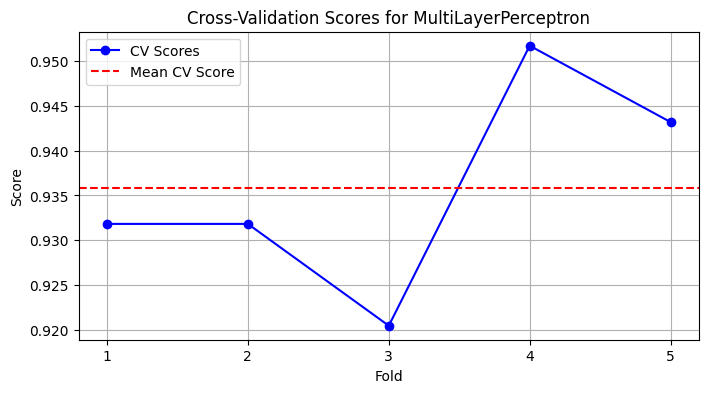

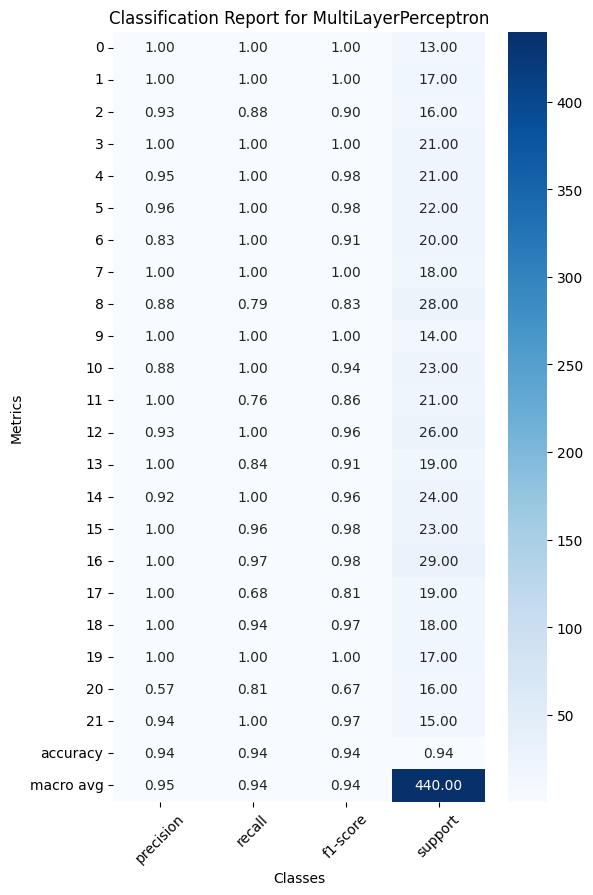

In [158]:
MultiLayerPerceptronAlgo()

## Base Models Comparisons

### Creating DataFrame

In [159]:
results_df = pd.DataFrame({
    'Model': model_list,
    'Accuracy': acc_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'Cross-Validation Score': cross_val_score_list
})


In [160]:
results_df.set_index('Model', inplace=True)

In [161]:
results_df

,Accuracy,Precision,Recall,F1 Score,Cross-Validation Score
Model,,,,,
DecisionTree,69.772727,0.594339,0.697727,0.622662,0.689773
NaiveBayes,99.090909,0.992045,0.990909,0.990563,0.996023
SupportVectorMachine,77.045455,0.801296,0.770455,0.771169,0.786932
LogisticRegression,96.363636,0.964409,0.963636,0.963100,0.972159
RandomForest,99.090909,0.991308,0.990909,0.990849,0.989773
XGBoost,99.090909,0.991259,0.990909,0.990836,0.985795
KthNearestNeighbor,96.818182,0.969777,0.968182,0.968162,0.977841
GradientBoosting,99.318182,0.993801,0.993182,0.993235,0.988068
ExtraTrees,99.545455,0.995758,0.995455,0.995381,0.993182


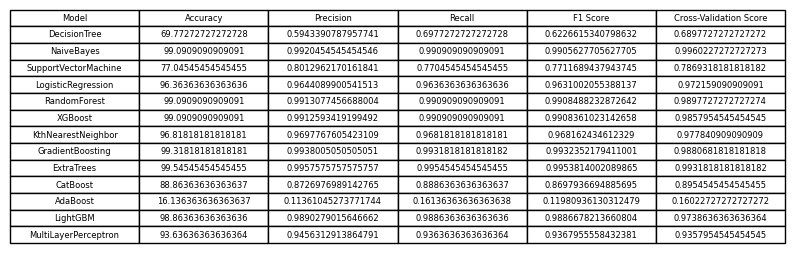

In [240]:
dataframe_to_image(results_df)

In [163]:
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
results_df_sorted

,Accuracy,Precision,Recall,F1 Score,Cross-Validation Score
Model,,,,,
ExtraTrees,99.545455,0.995758,0.995455,0.995381,0.993182
GradientBoosting,99.318182,0.993801,0.993182,0.993235,0.988068
NaiveBayes,99.090909,0.992045,0.990909,0.990563,0.996023
RandomForest,99.090909,0.991308,0.990909,0.990849,0.989773
XGBoost,99.090909,0.991259,0.990909,0.990836,0.985795
LightGBM,98.863636,0.989028,0.988636,0.988668,0.973864
KthNearestNeighbor,96.818182,0.969777,0.968182,0.968162,0.977841
LogisticRegression,96.363636,0.964409,0.963636,0.963100,0.972159
MultiLayerPerceptron,93.636364,0.945631,0.936364,0.936796,0.935795


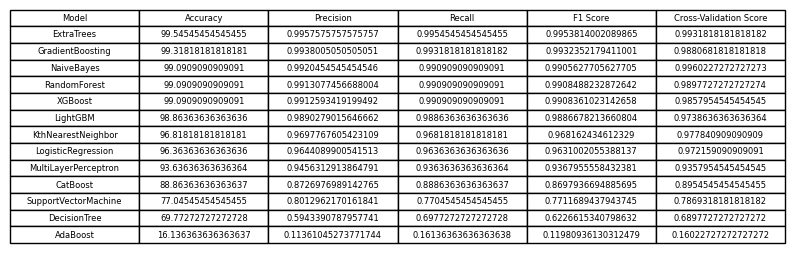

In [164]:
dataframe_to_image(results_df_sorted, filename='Results Sorted.png')

### Plot

#### Accuracy

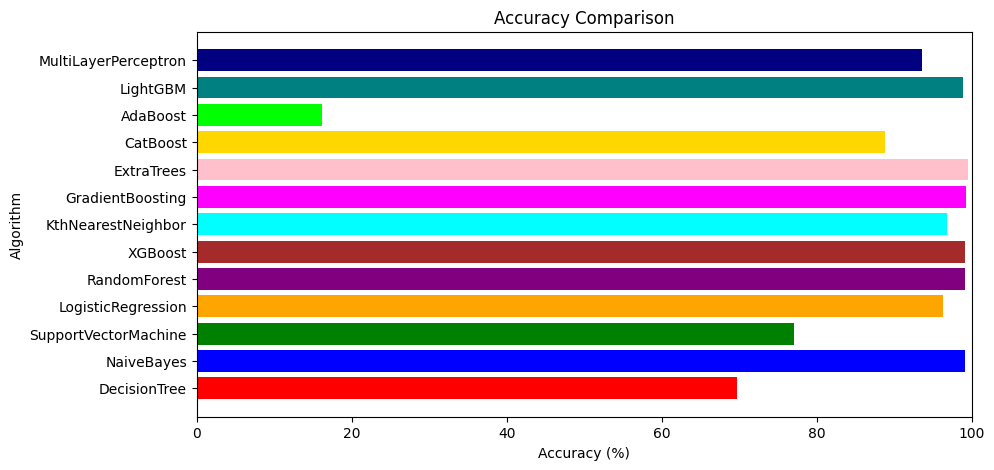

In [165]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_list, acc_list, color=colors)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Algorithm')
plt.xlim(0, 100)
plt.savefig('../Base Models/Comparative Analysis/Accuracy Comparison', dpi=1000, bbox_inches='tight')
plt.show()

#### Precision

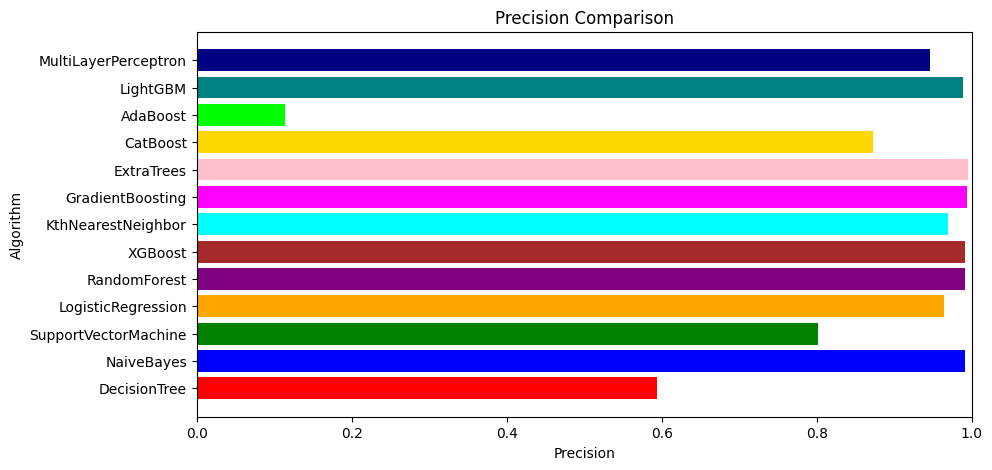

In [166]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_list, precision_list, color=colors)
plt.title('Precision Comparison')
plt.xlabel('Precision')
plt.ylabel('Algorithm')
plt.xlim(0, 1)
plt.savefig('../Base Models/Comparative Analysis/Precision Comparison', dpi=1000, bbox_inches='tight')
plt.show()

#### Recall

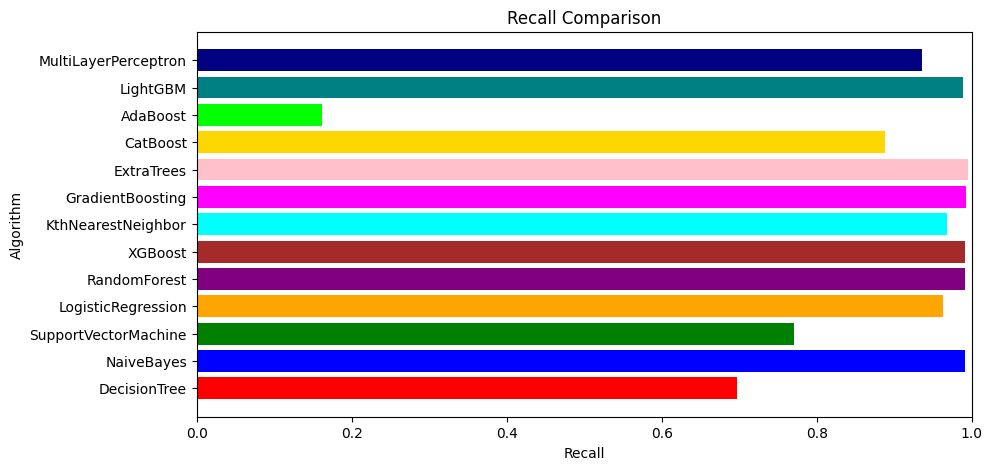

In [167]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_list, recall_list, color=colors)
plt.title('Recall Comparison')
plt.xlabel('Recall')
plt.ylabel('Algorithm')
plt.xlim(0, 1)
plt.savefig('../Base Models/Comparative Analysis/Recall Comparison', dpi=1000, bbox_inches='tight')
plt.show()

#### F1 Score

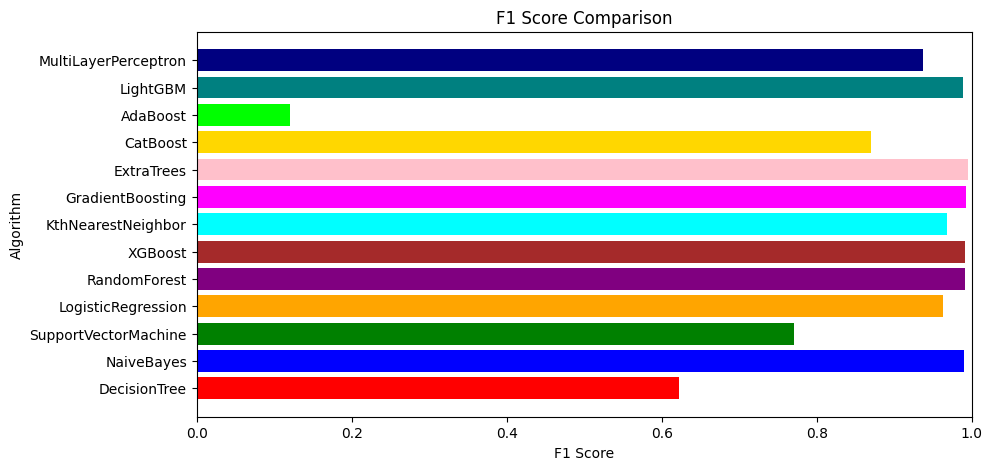

In [168]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_list, f1_list, color=colors)
plt.title('F1 Score Comparison')
plt.xlabel('F1 Score')
plt.ylabel('Algorithm')
plt.xlim(0, 1)
plt.savefig('../Base Models/Comparative Analysis/F1 Score Comparison', dpi=1000, bbox_inches='tight')
plt.show()

#### Cross-Validation Score

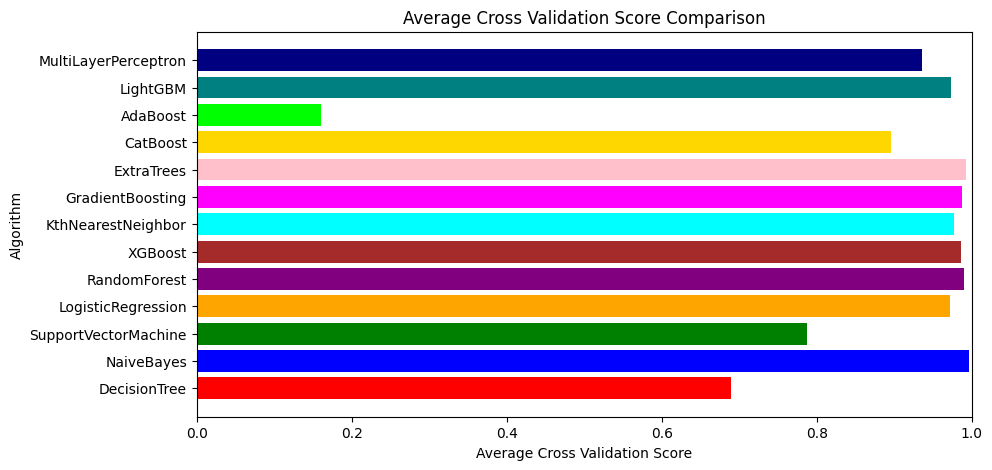

In [169]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_list, cross_val_score_list, color=colors)
plt.title('Average Cross Validation Score Comparison')
plt.xlabel('Average Cross Validation Score')
plt.ylabel('Algorithm')
plt.xlim(0, 1)
plt.savefig('../Base Models/Comparative Analysis/Average Cross Validation Score Comparison', dpi=1000, bbox_inches='tight')
plt.show()

## Hybrid Models

### Intiaiting Variables

In [196]:
acc_hyd = []
precision_hyd = []
recall_hyd = []
f1_hyd = []
model_hyd = []
cross_val_score_hyd = []
model_type_hyd = []

In [171]:
def load_model(pkl_filename):
    with open(pkl_filename, 'rb') as file:
        model = pickle.load(file)
    return model

In [193]:
ExtraTrees = load_model('../Base Models/Models/ExtraTrees.pkl')
GradientBoosting = load_model('../Base Models/Models/GradientBoosting.pkl')
NaiveBayes = load_model('../Base Models/Models/NaiveBayes.pkl')
RandomForest = load_model('../Base Models/Models/RandomForest.pkl')
XGBoost = load_model('../Base Models/Models/XGBoost.pkl')
LightGBM = load_model('../Base Models/Models/LightGBM.pkl')

In [195]:
best_base_models = [
    ('ExtraTrees', ExtraTrees),
    ('GradientBoosting', GradientBoosting),
    ('NaiveBayes', NaiveBayes),
    ('RandomForest', RandomForest),
    ('XGBoost', XGBoost),
    ('LightGBM', LightGBM)
]

### VotingClassifier (Hard)

In [197]:
def VotingClassifierHybridModelHard(model_name='VotingClassifierHard'):
    VotingClassHard = VotingClassifier(estimators=best_base_models, voting='hard')
    train_and_evaluate_model(VotingClassHard, model_name,acc_hyd,precision_hyd,recall_hyd,f1_hyd,model_hyd,cross_val_score_hyd,model_type_hyd,model_path='Hybrid Model')

VotingClassifierHard's Accuracy: 99.54545454545455%
Precision: 0.9957575757575757
Recall: 0.9954545454545455
F1 Score: 0.9953814002089865
Cross-Validation Scores: [0.99715909 0.99431818 0.99715909 0.99431818 0.99147727]
Mean Cross-Validation Score: 0.9948863636363636


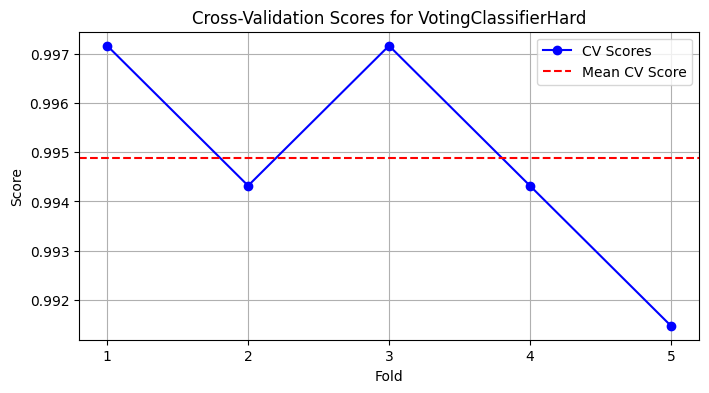

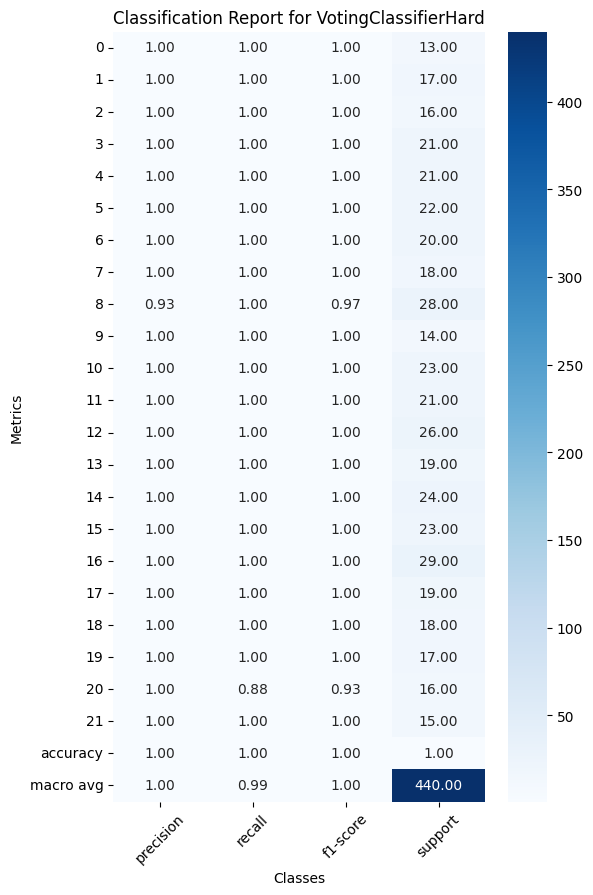

In [198]:
VotingClassifierHybridModelHard()

### VotingClassifier (Soft)

In [199]:
def VotingClassifierHybridModelSoft(model_name='VotingClassifierSoft'):
    VotingClassSoft = VotingClassifier(estimators=best_base_models, voting='soft')
    train_and_evaluate_model(VotingClassSoft, model_name,acc_hyd,precision_hyd,recall_hyd,f1_hyd,model_hyd,cross_val_score_hyd,model_type_hyd,model_path='Hybrid Model')

VotingClassifierSoft's Accuracy: 99.54545454545455%
Precision: 0.9957575757575757
Recall: 0.9954545454545455
F1 Score: 0.9953814002089865
Cross-Validation Scores: [0.99715909 0.99431818 0.99715909 0.99715909 0.98863636]
Mean Cross-Validation Score: 0.9948863636363636


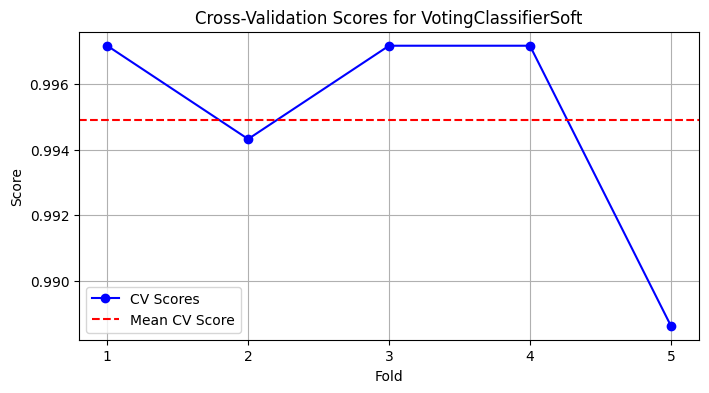

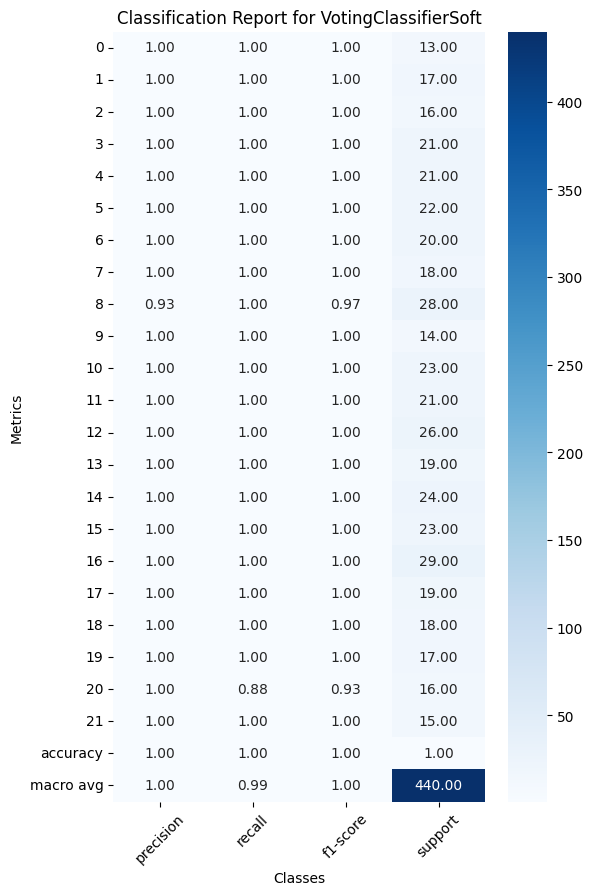

In [200]:
VotingClassifierHybridModelSoft()

### Stacking

In [207]:
def StackingHybridModel(model_name='StackingHybridModel'):
    StackingEnsemble = StackingClassifier(
        estimators = best_base_models+[],
        final_estimator=ExtraTreesClassifier(n_estimators=100, random_state=0)
    )
    train_and_evaluate_model(StackingEnsemble, model_name,acc_hyd,precision_hyd,recall_hyd,f1_hyd,model_hyd,cross_val_score_hyd,model_type_hyd,model_path='Hybrid Model')

StackingHybridModel's Accuracy: 99.77272727272727%
Precision: 0.9978056426332289
Recall: 0.9977272727272727
F1 Score: 0.9977105520399239
Cross-Validation Scores: [0.99715909 0.99431818 0.99431818 0.99431818 0.98863636]
Mean Cross-Validation Score: 0.99375


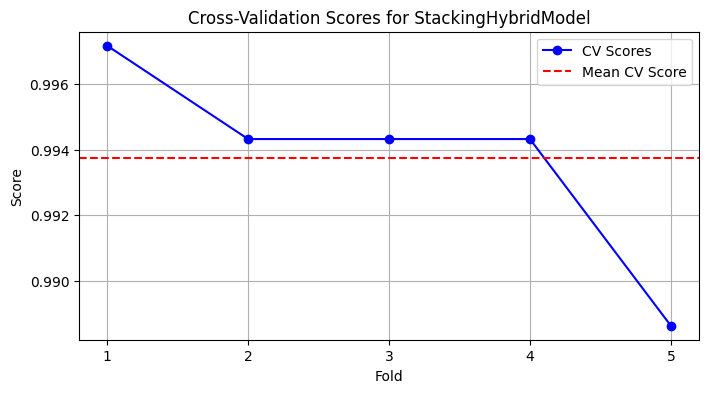

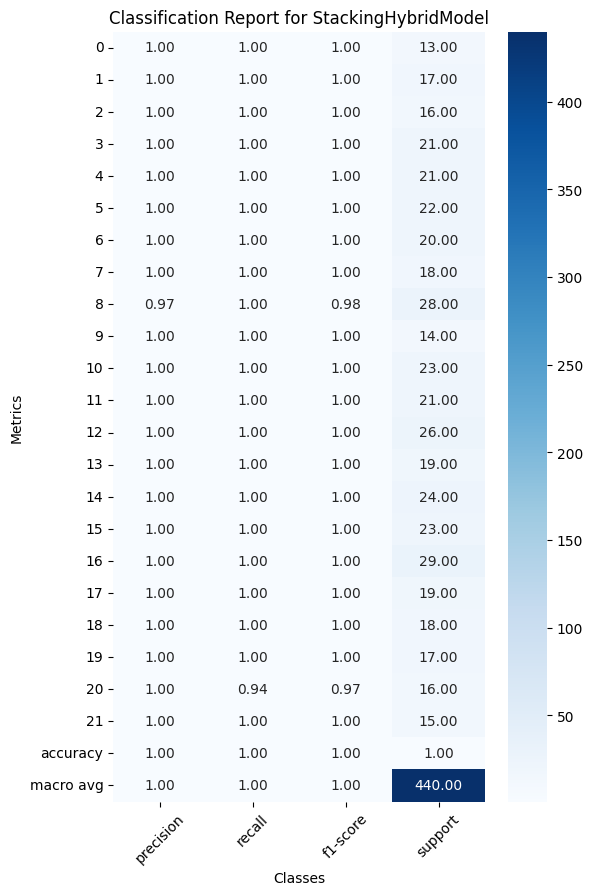

In [208]:
StackingHybridModel()

### BaggingClass

In [203]:
def BaggingHybridModel(model_name='BaggingHybridModel'):
    VotingEnsemble = VotingClassifier(estimators=best_base_models,voting='soft')
    BaggingEnsemble = BaggingClassifier(estimator=VotingEnsemble,n_estimators=10,random_state=0)
    train_and_evaluate_model(BaggingEnsemble, model_name,acc_hyd,precision_hyd,recall_hyd,f1_hyd,model_hyd,cross_val_score_hyd,model_type_hyd,model_path='Hybrid Model')

BaggingHybridModel's Accuracy: 99.0909090909091%
Precision: 0.9920454545454546
Recall: 0.990909090909091
F1 Score: 0.9905627705627705
Cross-Validation Scores: [1.         0.99431818 0.99715909 0.99147727 0.99147727]
Mean Cross-Validation Score: 0.9948863636363635


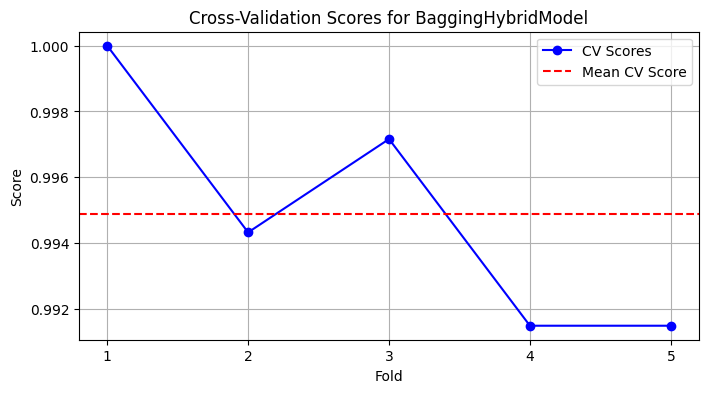

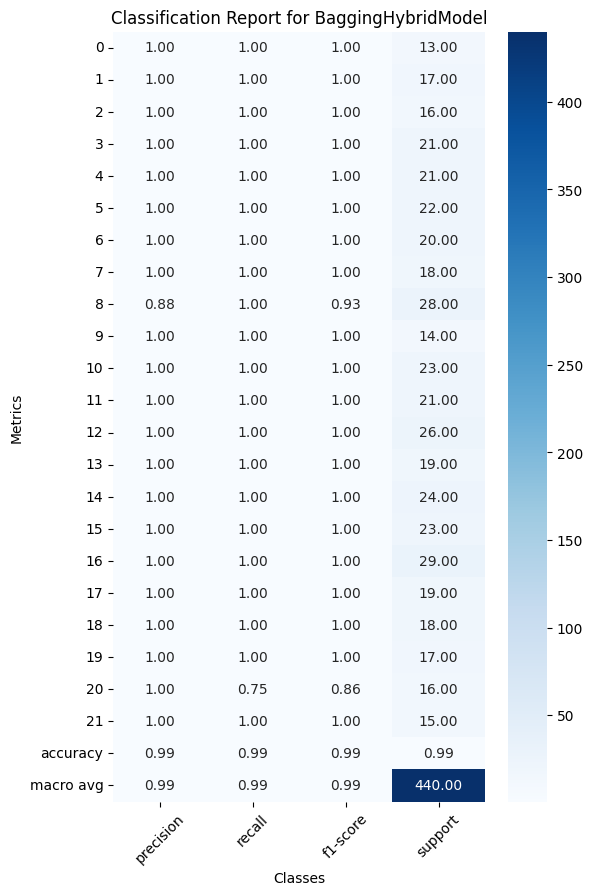

In [204]:
BaggingHybridModel()

## Hybrid Models Comparisons

### Creating DataFrame

In [236]:
results_hyd_df = pd.DataFrame({
    'Model': model_hyd,
    'Accuracy': acc_hyd,
    'Precision': precision_hyd,
    'Recall': recall_hyd,
    'F1 Score': f1_hyd,
    'Cross-Validation Score': cross_val_score_hyd
})


In [237]:
results_hyd_df.set_index('Model', inplace=True)

In [238]:
results_hyd_df

,Accuracy,Precision,Recall,F1 Score,Cross-Validation Score
Model,,,,,
VotingClassifierHard,99.545455,0.995758,0.995455,0.995381,0.994886
VotingClassifierSoft,99.545455,0.995758,0.995455,0.995381,0.994886
BaggingHybridModel,99.090909,0.992045,0.990909,0.990563,0.994886
StackingHybridModel,99.772727,0.997806,0.997727,0.997711,0.993750


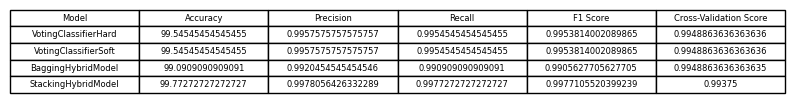

In [244]:
dataframe_to_image(results_hyd_df,filename='Hybrid Results.png',path='Hybrid Models',figsize=(10,0.5))

In [245]:
results_hyd_df_sorted = results_hyd_df.sort_values(by='Accuracy', ascending=False)
results_hyd_df_sorted

,Accuracy,Precision,Recall,F1 Score,Cross-Validation Score
Model,,,,,
StackingHybridModel,99.772727,0.997806,0.997727,0.997711,0.993750
VotingClassifierHard,99.545455,0.995758,0.995455,0.995381,0.994886
VotingClassifierSoft,99.545455,0.995758,0.995455,0.995381,0.994886
BaggingHybridModel,99.090909,0.992045,0.990909,0.990563,0.994886


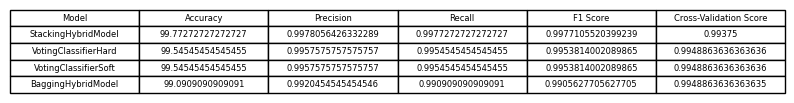

In [246]:
dataframe_to_image(results_hyd_df_sorted, filename='Hybrid Results Sorted.png',path='Hybrid Models',figsize=(10,0.5))

### Plot

#### Accuracy

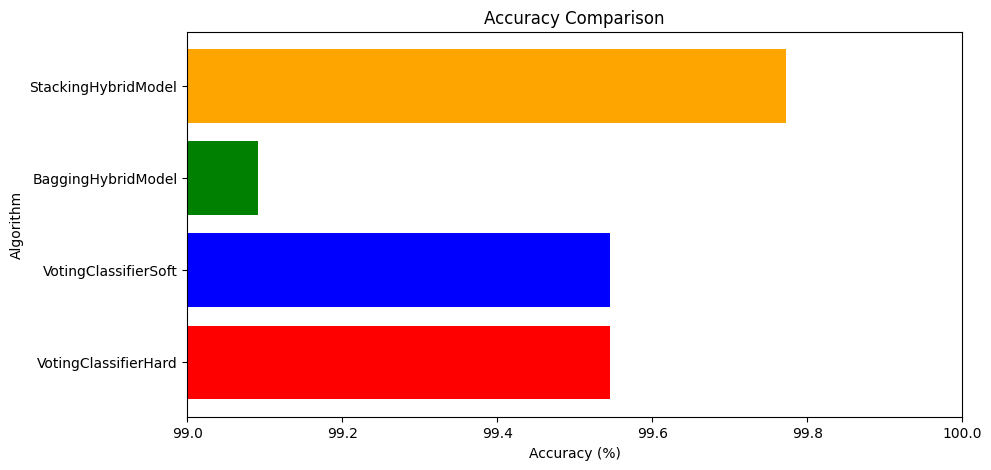

In [279]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_hyd, acc_hyd, color=colors)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Algorithm')
plt.xlim(99, 100)
plt.savefig('../Hybrid Models/Comparative Analysis/Accuracy Comparison', dpi=1000, bbox_inches='tight')
plt.show()

#### Precision

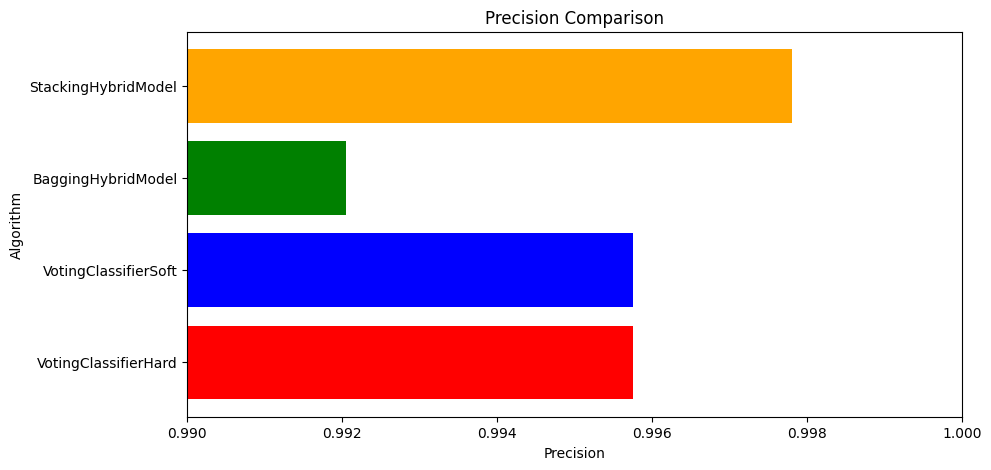

In [249]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_hyd, precision_hyd, color=colors)
plt.title('Precision Comparison')
plt.xlabel('Precision')
plt.ylabel('Algorithm')
plt.xlim(0.99, 1)
plt.savefig('../Hybrid Models/Comparative Analysis/Precision Comparison', dpi=1000, bbox_inches='tight')
plt.show()

#### Recall

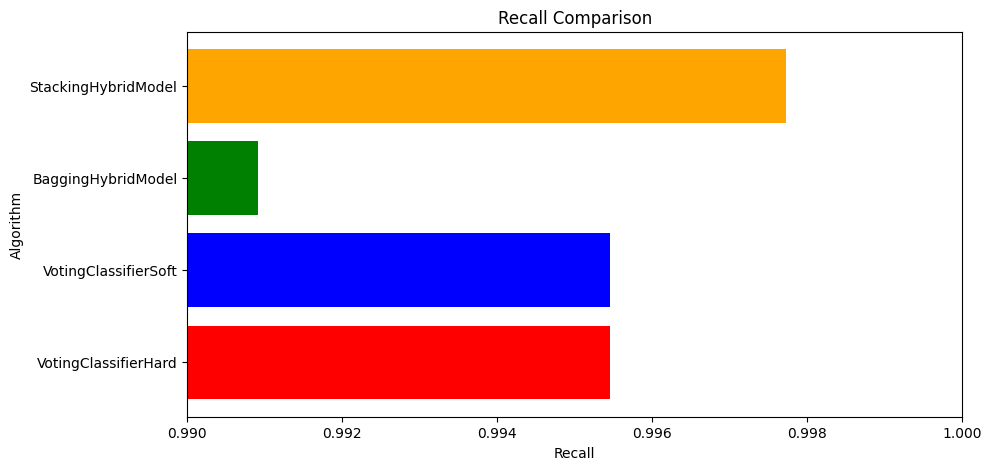

In [250]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_hyd, recall_hyd, color=colors)
plt.title('Recall Comparison')
plt.xlabel('Recall')
plt.ylabel('Algorithm')
plt.xlim(0.99, 1)
plt.savefig('../Hybrid Models/Comparative Analysis/Recall Comparison', dpi=1000, bbox_inches='tight')
plt.show()

#### F1 Score

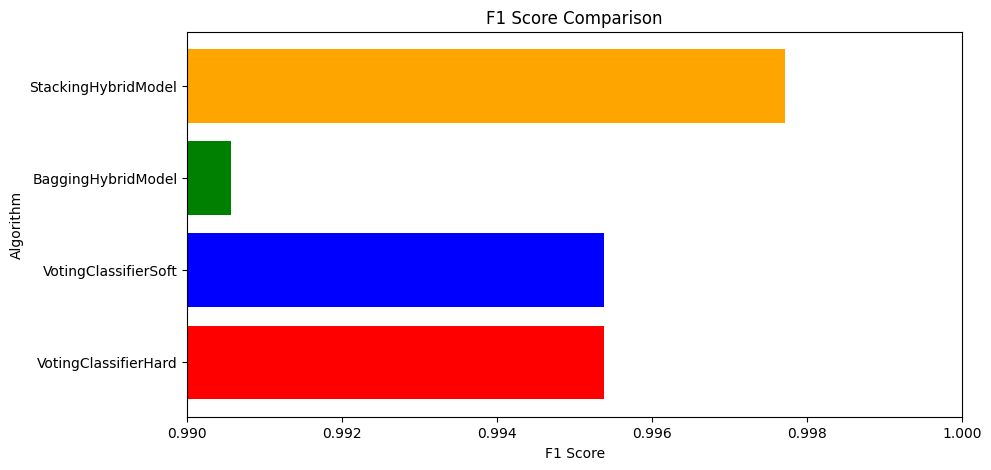

In [251]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_hyd, f1_hyd, color=colors)
plt.title('F1 Score Comparison')
plt.xlabel('F1 Score')
plt.ylabel('Algorithm')
plt.xlim(0.99, 1)
plt.savefig('../Hybrid Models/Comparative Analysis/F1 Score Comparison', dpi=1000, bbox_inches='tight')
plt.show()

#### Cross-Validation Score

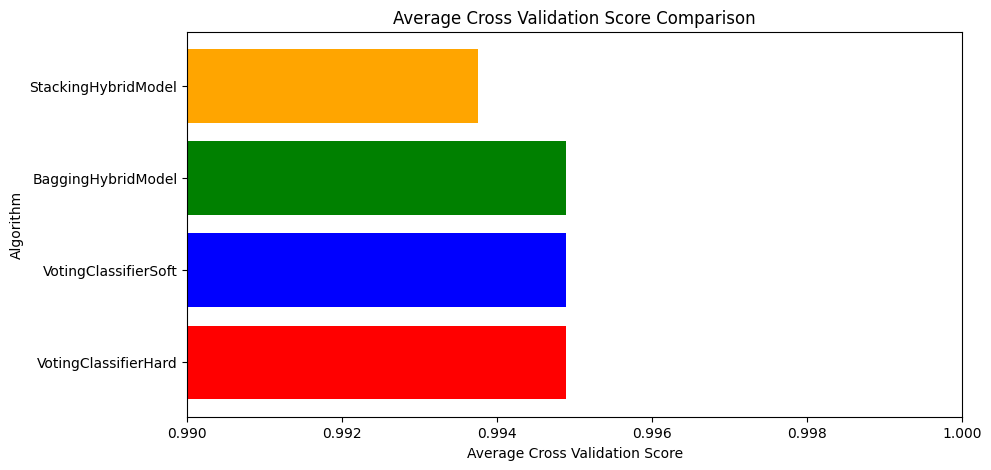

In [253]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_hyd, cross_val_score_hyd, color=colors)
plt.title('Average Cross Validation Score Comparison')
plt.xlabel('Average Cross Validation Score')
plt.ylabel('Algorithm')
plt.xlim(0.99, 1)
plt.savefig('../Hybrid Models/Comparative Analysis/Average Cross Validation Score Comparison', dpi=1000, bbox_inches='tight')
plt.show()

## Finding Best Model

### Creating DataFrame

In [232]:
models = model_list + model_hyd
model_type = model_type_list + model_type_hyd
acc = acc_list + acc_hyd
precision = precision_list + precision_hyd
recall = recall_list + recall_hyd
f1 = f1_list + f1_hyd
cross_val_score = cross_val_score_list + cross_val_score_hyd

print("Models:", models)
print("Model Types:", model_type)
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Cross-Validation Score:", cross_val_score)


Models: ['DecisionTree', 'NaiveBayes', 'SupportVectorMachine', 'LogisticRegression', 'RandomForest', 'XGBoost', 'KthNearestNeighbor', 'GradientBoosting', 'ExtraTrees', 'CatBoost', 'AdaBoost', 'LightGBM', 'MultiLayerPerceptron', 'VotingClassifierHard', 'VotingClassifierSoft', 'BaggingHybridModel', 'StackingHybridModel']
Model Types: ['Base Model', 'Base Model', 'Base Model', 'Base Model', 'Base Model', 'Base Model', 'Base Model', 'Base Model', 'Base Model', 'Base Model', 'Base Model', 'Base Model', 'Base Model', 'Hybrid Model', 'Hybrid Model', 'Hybrid Model', 'Hybrid Model']
Accuracy: [69.77272727272728, 99.0909090909091, 77.04545454545455, 96.36363636363636, 99.0909090909091, 99.0909090909091, 96.81818181818181, 99.31818181818181, 99.54545454545455, 88.86363636363637, 16.136363636363637, 98.86363636363636, 93.63636363636364, 99.54545454545455, 99.54545454545455, 99.0909090909091, 99.77272727272727]
Precision: [0.5943390787957741, 0.9920454545454546, 0.8012962170161841, 0.96440899005415

In [254]:
best_df = pd.DataFrame({
    'Model': models,
    'Model Type': model_type,
    'Accuracy': acc,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Cross-Validation Score': cross_val_score
})


In [255]:
best_df

,Model,Model Type,Accuracy,Precision,Recall,F1 Score,Cross-Validation Score
0,DecisionTree,Base Model,69.772727,0.594339,0.697727,0.622662,0.689773
1,NaiveBayes,Base Model,99.090909,0.992045,0.990909,0.990563,0.996023
2,SupportVectorMachine,Base Model,77.045455,0.801296,0.770455,0.771169,0.786932
3,LogisticRegression,Base Model,96.363636,0.964409,0.963636,0.963100,0.972159
4,RandomForest,Base Model,99.090909,0.991308,0.990909,0.990849,0.989773
5,XGBoost,Base Model,99.090909,0.991259,0.990909,0.990836,0.985795
6,KthNearestNeighbor,Base Model,96.818182,0.969777,0.968182,0.968162,0.977841
7,GradientBoosting,Base Model,99.318182,0.993801,0.993182,0.993235,0.988068
8,ExtraTrees,Base Model,99.545455,0.995758,0.995455,0.995381,0.993182
9,CatBoost,Base Model,88.863636,0.872698,0.888636,0.869794,0.895455


In [256]:
best_df.set_index('Model', inplace=True)

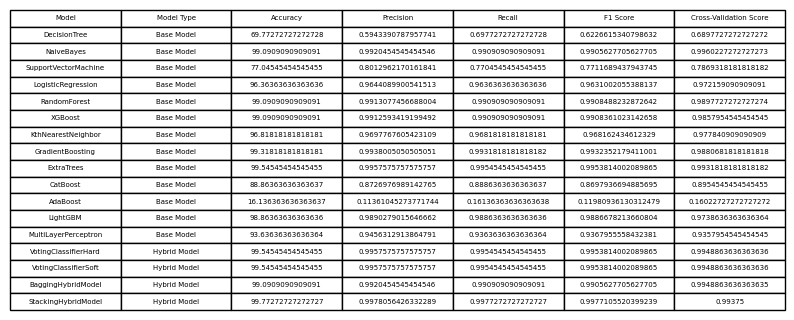

In [271]:
best_df_reset = best_df.reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=best_df_reset.values, colLabels=best_df_reset.columns, cellLoc='center', loc='center')
plt.savefig('../Best Model/Model Comparisons.png', dpi=1000, bbox_inches='tight')
plt.show()

### Filtering Models

In [260]:
filtered_models = best_df_reset[best_df_reset['Accuracy'] >= 99]
filtered_models.set_index('Model', inplace=True)
filtered_models

,Model Type,Accuracy,Precision,Recall,F1 Score,Cross-Validation Score
Model,,,,,,
NaiveBayes,Base Model,99.090909,0.992045,0.990909,0.990563,0.996023
RandomForest,Base Model,99.090909,0.991308,0.990909,0.990849,0.989773
XGBoost,Base Model,99.090909,0.991259,0.990909,0.990836,0.985795
GradientBoosting,Base Model,99.318182,0.993801,0.993182,0.993235,0.988068
ExtraTrees,Base Model,99.545455,0.995758,0.995455,0.995381,0.993182
VotingClassifierHard,Hybrid Model,99.545455,0.995758,0.995455,0.995381,0.994886
VotingClassifierSoft,Hybrid Model,99.545455,0.995758,0.995455,0.995381,0.994886
BaggingHybridModel,Hybrid Model,99.090909,0.992045,0.990909,0.990563,0.994886
StackingHybridModel,Hybrid Model,99.772727,0.997806,0.997727,0.997711,0.993750


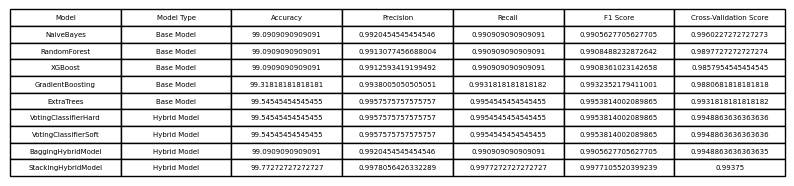

In [270]:
filtered_models_reset = filtered_models.reset_index()
fig, ax = plt.subplots(figsize=(10, .5))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=filtered_models_reset.values, colLabels=filtered_models_reset.columns, cellLoc='center', loc='center')
plt.savefig('../Best Model/Filtered Models Comparisons.png', dpi=1000, bbox_inches='tight')
plt.show()

In [263]:
sorted_filtered_models = filtered_models.sort_values(by=['Accuracy','Precision','Recall','F1 Score', 'Cross-Validation Score'], ascending=[False, False, False, False, False])
sorted_filtered_models

,Model Type,Accuracy,Precision,Recall,F1 Score,Cross-Validation Score
Model,,,,,,
StackingHybridModel,Hybrid Model,99.772727,0.997806,0.997727,0.997711,0.993750
VotingClassifierHard,Hybrid Model,99.545455,0.995758,0.995455,0.995381,0.994886
VotingClassifierSoft,Hybrid Model,99.545455,0.995758,0.995455,0.995381,0.994886
ExtraTrees,Base Model,99.545455,0.995758,0.995455,0.995381,0.993182
GradientBoosting,Base Model,99.318182,0.993801,0.993182,0.993235,0.988068
NaiveBayes,Base Model,99.090909,0.992045,0.990909,0.990563,0.996023
BaggingHybridModel,Hybrid Model,99.090909,0.992045,0.990909,0.990563,0.994886
RandomForest,Base Model,99.090909,0.991308,0.990909,0.990849,0.989773
XGBoost,Base Model,99.090909,0.991259,0.990909,0.990836,0.985795


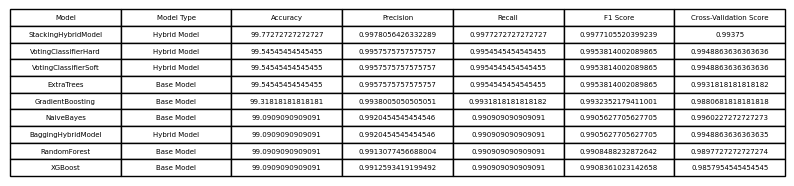

In [269]:
sorted_filtered_models_reset = sorted_filtered_models.reset_index()
fig, ax = plt.subplots(figsize=(10, .5))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=sorted_filtered_models_reset.values, colLabels=sorted_filtered_models_reset.columns, cellLoc='center', loc='center')
plt.savefig('../Best Model/Sorted Filtered Models Comparisons.png', dpi=1000, bbox_inches='tight')
plt.show()

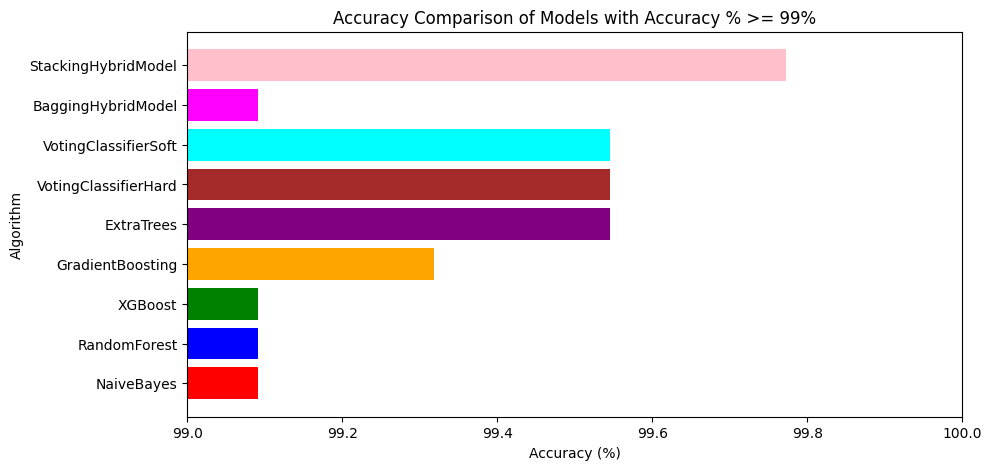

In [281]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(filtered_models_reset['Model'], filtered_models_reset['Accuracy'], color=colors)
plt.title('Accuracy Comparison of Models with Accuracy % >= 99%')
plt.xlabel('Accuracy (%)')
plt.ylabel('Algorithm')
plt.xlim(99, 100)
plt.savefig('../Best Model/Accuracy Comparison.png', dpi=1000, bbox_inches='tight')
plt.show()

### Extracting Best Model and Saving it

In [274]:
best_model = sorted_filtered_models_reset.iloc[0]
best_model

Model                     StackingHybridModel
Model Type                       Hybrid Model
Accuracy                            99.772727
Precision                            0.997806
Recall                               0.997727
F1 Score                             0.997711
Cross-Validation Score                0.99375
Name: 0, dtype: object

In [276]:
modelName = best_model['Model']
modelPath = f"../{best_model['Model Type']}s/Models/{modelName}.pkl"
bestModel = load_model(modelPath)

print(modelName)
print(modelPath)

StackingHybridModel
../Hybrid Models/Models/StackingHybridModel.pkl


In [277]:
with open('../bestModel.pkl', 'wb') as Model_pkl:
    pickle.dump(bestModel, Model_pkl)